Código abaixo realiza a extração de dados do site da Nfl e importa requests,que realiza a requisição get para obter os dados da pagina,encontra a tabela com os dados,extrai os dados do cabeçalho e extrair os dados das linhas tabela,criar o dataframe e salva o dataframe usando Pandas,cria uma planilha excel,quando conlcuido retorna a informação de que os dados foram extraidos e salvos com sucesso.

In [54]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns

# URL inicial
base_url = "https://www.nfl.com/stats/player-stats/category/interceptions/2023/reg/all/defensiveinterceptions/desc?page="

# Lista para armazenar todos os dados
all_data = []

# Loop através das páginas
for page in range(1, 11):  # Considerando 10 páginas (1 a 10)
    url = base_url + str(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encontrar a tabela de estatísticas
    table = soup.find('table')
    headers = [header.text.strip() for header in table.find_all('th')]

    # Extração dos dados das linhas da tabela
    for row in table.find_all('tr')[1:]:  # Pular o cabeçalho
        cols = row.find_all('td')
        data = [col.text.strip() for col in cols]
        all_data.append(data)

# Criar um DataFrame
df = pd.DataFrame(all_data, columns=headers)

df = df.drop_duplicates()

# Exportar para CSV
df.to_csv('interceptions_stats.csv', index=False)

print("Dados extraídos com sucesso, duplicatas removidas e salvos em 'interceptions_stats.csv'")




Dados extraídos com sucesso, duplicatas removidas e salvos em 'interceptions_stats.csv'


criando o dataframe 

In [55]:
df=pd.read_csv('interceptions_stats.csv')

Lendo o cabeçalho do dataframe.

In [56]:
df.head()

,Player,INT,INT TD,INT Yds,Lng
0,DaRon Bland,9,5,209,63
1,Geno Stone,7,0,101,36
2,Jessie Bates,6,1,95,92
3,Rasul Douglas,5,1,56,40
4,Derek Stingley Jr.,5,0,17,14


Identificando se temos dados nulls no dataframe 

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Player   25 non-null     object
 1   INT      25 non-null     int64 
 2   INT TD   25 non-null     int64 
 3   INT Yds  25 non-null     int64 
 4   Lng      25 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


Renomeando colunas

In [58]:

# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Renomear as colunas
df.rename(columns={
    'Player': 'Jogador',
    'INT': 'Interceptações',
    'INT TD': 'Intercept_TD',
    'INT Yds': 'Intercept_Jardas',
    'Lng': 'RIL'
}, inplace=True)

print(df.head())


              Jogador  Interceptações  Intercept_TD  Intercept_Jardas  RIL
0         DaRon Bland               9             5               209   63
1          Geno Stone               7             0               101   36
2        Jessie Bates               6             1                95   92
3       Rasul Douglas               5             1                56   40
4  Derek Stingley Jr.               5             0                17   14


In [59]:
df.rename(columns={
    '\nPlayer\n':'Jogador'
}, inplace=True)

# Exibindo o DataFrame para verificar as mudanças
print(df)


               Jogador  Interceptações  Intercept_TD  Intercept_Jardas  RIL
0          DaRon Bland               9             5               209   63
1           Geno Stone               7             0               101   36
2         Jessie Bates               6             1                95   92
3        Rasul Douglas               5             1                56   40
4   Derek Stingley Jr.               5             0                17   14
5      Charvarius Ward               5             1                91   66
6        Paulson Adebo               4             0                32   27
7      Julian Blackmon               4             0                39   25
8          Andre Cisco               4             0                68   29
9     Tremaine Edmunds               4             1                61   45
10      Martin Emerson               4             0                25   14
11       Kyle Hamilton               4             1                25   18
12      Jayl

In [60]:
df.columns = df.columns.str.strip().str.replace('\n', '')

# Agora renomeie a coluna
df.rename(columns={
    'Player': 'Jogador'
}, inplace=True)

print(df)


               Jogador  Interceptações  Intercept_TD  Intercept_Jardas  RIL
0          DaRon Bland               9             5               209   63
1           Geno Stone               7             0               101   36
2         Jessie Bates               6             1                95   92
3        Rasul Douglas               5             1                56   40
4   Derek Stingley Jr.               5             0                17   14
5      Charvarius Ward               5             1                91   66
6        Paulson Adebo               4             0                32   27
7      Julian Blackmon               4             0                39   25
8          Andre Cisco               4             0                68   29
9     Tremaine Edmunds               4             1                61   45
10      Martin Emerson               4             0                25   14
11       Kyle Hamilton               4             1                25   18
12      Jayl

In [61]:
total_interceptions = df['Interceptações'].sum()
total_td = df['Intercept_TD'].sum()
total_yards = df['Intercept_Jardas'].sum()


In [62]:
df

,Jogador,Interceptações,Intercept_TD,Intercept_Jardas,RIL
0,DaRon Bland,9,5,209,63
1,Geno Stone,7,0,101,36
2,Jessie Bates,6,1,95,92
3,Rasul Douglas,5,1,56,40
4,Derek Stingley Jr.,5,0,17,14
5,Charvarius Ward,5,1,91,66
6,Paulson Adebo,4,0,32,27
7,Julian Blackmon,4,0,39,25
8,Andre Cisco,4,0,68,29
9,Tremaine Edmunds,4,1,61,45


In [70]:
# Analisando os dados e extraindo as principais métricas
# Total de interceptações, touchdowns, jardas e maior interceptação
total_interceptions = df['Interceptações'].sum()
total_td = df['Intercept_TD'].sum()
total_yards = df['Intercept_Jardas'].sum()

In [64]:
# Calculando a média de jardas por interceptação e touchdown por interceptação
df['Avg_Yards_Per_Intercept'] = df['Intercept_Jardas'] / df['Interceptações']
df['TD_Per_Intercept'] = df['Intercept_TD'] / df['Interceptações']

print(df)


               Jogador  Interceptações  Intercept_TD  Intercept_Jardas  RIL  \
0          DaRon Bland               9             5               209   63   
1           Geno Stone               7             0               101   36   
2         Jessie Bates               6             1                95   92   
3        Rasul Douglas               5             1                56   40   
4   Derek Stingley Jr.               5             0                17   14   
5      Charvarius Ward               5             1                91   66   
6        Paulson Adebo               4             0                32   27   
7      Julian Blackmon               4             0                39   25   
8          Andre Cisco               4             0                68   29   
9     Tremaine Edmunds               4             1                61   45   
10      Martin Emerson               4             0                25   14   
11       Kyle Hamilton               4             1

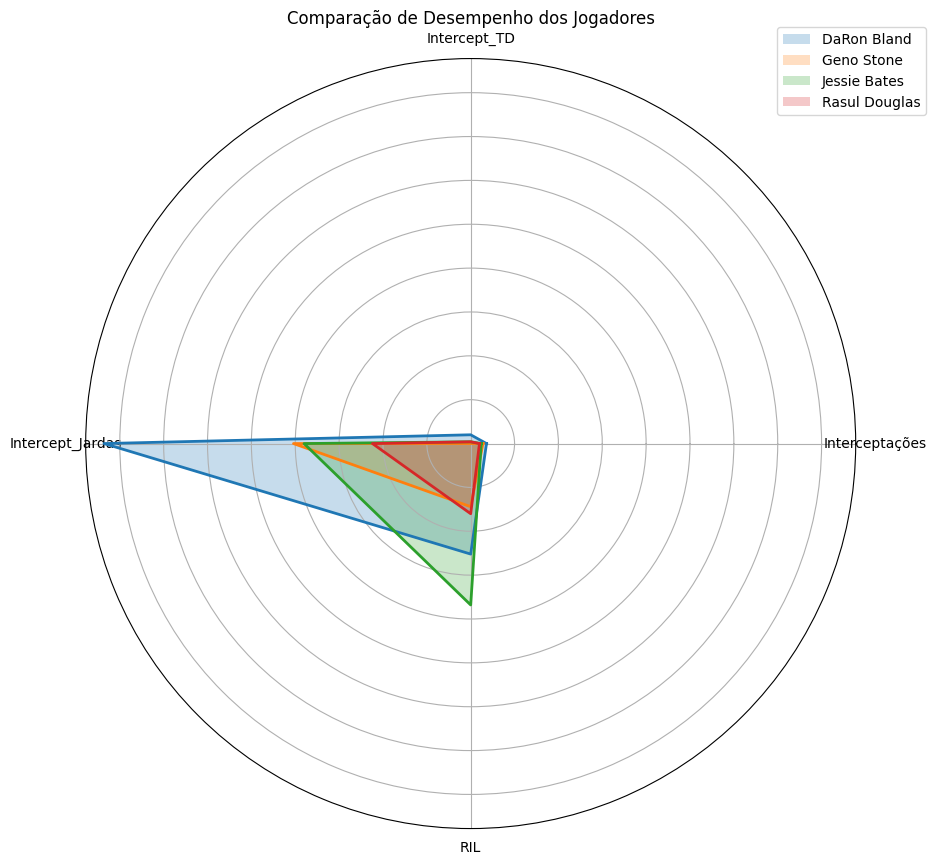

In [65]:

# Função para criar gráfico de radar comparando múltiplos jogadores
def radar_chart(df, categories):
    labels = np.array(categories)
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    for player, data in df.iterrows():
        values = data[categories].values
        values = np.concatenate((values, [values[0]]))
        ax.fill(angles, values, alpha=0.25, label=player)
        ax.plot(angles, values, linewidth=2)
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, rotation=45)
    ax.legend(loc='best', bbox_to_anchor=(1.1, 1.05))
    
    plt.title('Comparação de Desempenho dos Jogadores')
    plt.show()

# Filtrando e removendo duplicatas
players_to_compare = ['DaRon Bland', 'Geno Stone', 'Jessie Bates', 'Rasul Douglas']
player_data = df[df['Jogador'].isin(players_to_compare)].drop_duplicates(subset='Jogador', keep='first').set_index('Jogador')
radar_chart(player_data, ['Interceptações', 'Intercept_TD', 'Intercept_Jardas', 'RIL'])

    

Top 5 Jogadores com Mais Interceptações:
               Jogador  Interceptações
0         DaRon Bland               9
1          Geno Stone               7
2        Jessie Bates               6
3       Rasul Douglas               5
4  Derek Stingley Jr.               5
Top 5 Jogadores com Mais Jardas:
             Jogador  Intercept_Jardas
0       DaRon Bland               209
15   Tyrann Mathieu               122
1        Geno Stone               101
2      Jessie Bates                95
5   Charvarius Ward                91


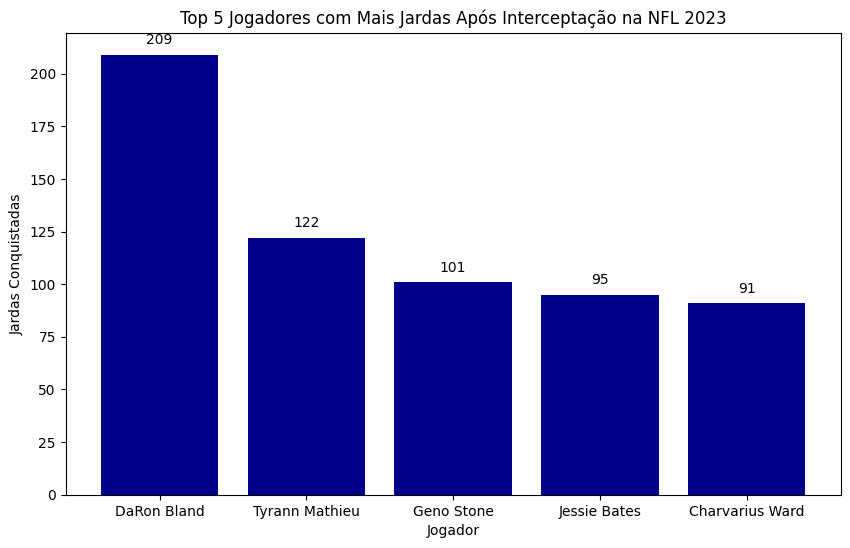

In [74]:
# Top 5 jogadores com mais interceptações
top_interceptions = df.sort_values(by='Interceptações', ascending=False).head(5)
print("Top 5 Jogadores com Mais Interceptações:\n", top_interceptions[['Jogador', 'Interceptações']])

# Top 5 jogadores com mais jardas
top_yards = df.sort_values(by='Intercept_Jardas', ascending=False).head(5)
print("Top 5 Jogadores com Mais Jardas:\n", top_yards[['Jogador', 'Intercept_Jardas']])


# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_yards['Jogador'], top_yards['Intercept_Jardas'], color='darkblue')

# Adicionar títulos e rótulos
plt.title('Top 5 Jogadores com Mais Jardas Após Interceptação na NFL 2023')
plt.xlabel('Jogador')
plt.ylabel('Jardas Conquistadas')

# Exibir o valor de jardas no topo de cada barra
for index, value in enumerate(top_yards['Intercept_Jardas']):
    plt.text(index, value + 5, str(value), ha='center')

# Mostrar o gráfico
plt.show()


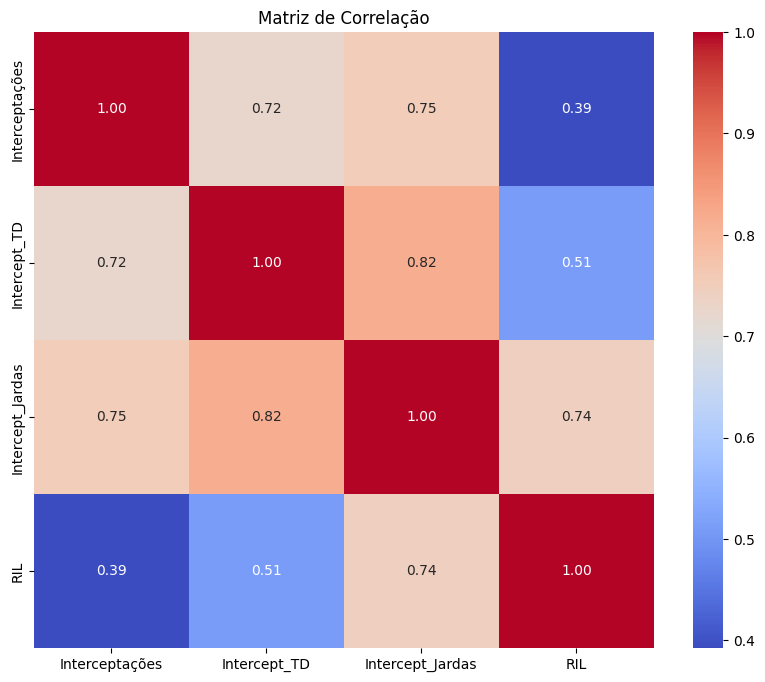

In [67]:
# Matriz de correlação

plt.figure(figsize=(10, 8))
correlation_matrix = df[['Interceptações', 'Intercept_TD', 'Intercept_Jardas', 'RIL']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()



Alta correlação positiva: As variáveis "Intercept_TD", "Intercept_Jardas" e "RIL" possuem uma alta correlação positiva com "Interceptações". Isso significa que, quanto mais interceptações um jogador faz, maior a probabilidade de ele marcar touchdowns, ganhar jardas e ter retornos de interceptação.
Correlação moderada: As variáveis "Intercept_TD", "Intercept_Jardas" e "RIL" também apresentam uma correlação moderadamente alta entre si. Isso indica que essas variáveis estão relacionadas e que um aumento em uma delas tende a estar associado a um aumento nas outras.
Diagonais: Os valores na diagonal principal são sempre 1, pois representam a correlação de uma variável com ela mesma.
Utilidade da Matriz de Correlação

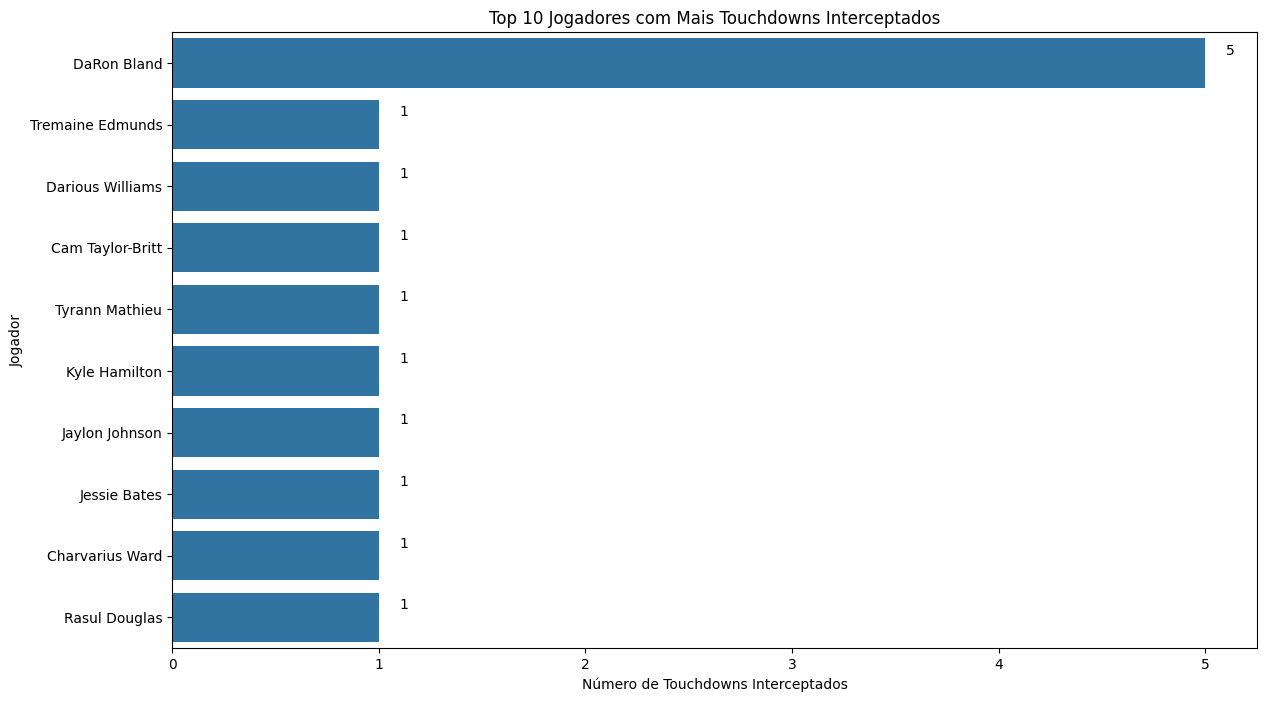

In [68]:
plt.figure(figsize=(14, 8))
top_players = df.sort_values(by='Intercept_TD', ascending=False).head(10)

# Criando o gráfico de barras
ax = sns.barplot(x='Intercept_TD', y='Jogador', data=top_players)

# Adicionando rótulos às barras
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2. - 0.2,
             f'{width:.0f}', ha='left', va='center')

plt.title('Top 10 Jogadores com Mais Touchdowns Interceptados')
plt.xlabel('Número de Touchdowns Interceptados')
plt.ylabel('Jogador')
plt.show()


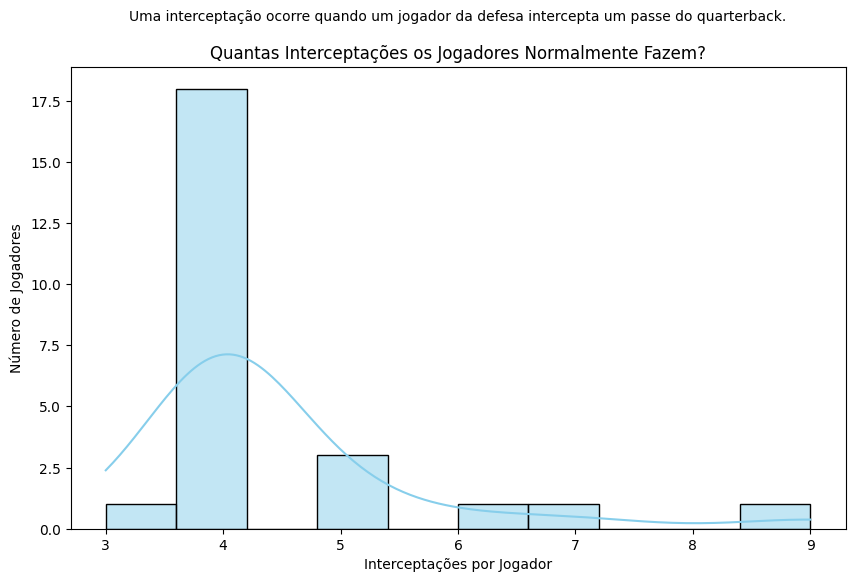

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Interceptações'], bins=10, kde=True, color='skyblue')
plt.title('Quantas Interceptações os Jogadores Normalmente Fazem?')
plt.xlabel('Interceptações por Jogador')
plt.ylabel('Número de Jogadores')

# Adicionando uma descrição
plt.text(0.5, 1.1, "Uma interceptação ocorre quando um jogador da defesa intercepta um passe do quarterback.",
         horizontalalignment='center', transform=plt.gca().transAxes)

plt.show()

A altura de cada barra em um histograma representa a frequência com que um determinado valor ou intervalo de valores ocorre nos dados.

No caso do seu histograma, a barra correspondente ao número 4 é significativamente mais alta do que as demais, indicando que:

Um número maior de jogadores: Obteve exatamente 4 interceptações durante o período analisado.
4 interceptações é um valor mais comum: Comparado aos outros valores (6, 7, 8 e 9 interceptações) no conjunto de dados.
Possíveis Razões para essa Distribuição:

Dificuldade da tarefa: Fazer 4 interceptações pode ser um marco significativo para muitos jogadores, representando um bom desempenho defensivo.
Estratégia de jogo: As equipes podem ter estratégias que favorecem um determinado número de interceptações por jogador, e 4 pode ser um número-alvo comum.
Flutuações estatísticas: Pode ser apenas uma variação aleatória nos dados, ou seja, uma coincidência estatística.